Начнем с генерации набора точек, представляющий собой данные для реализации алгоритма.

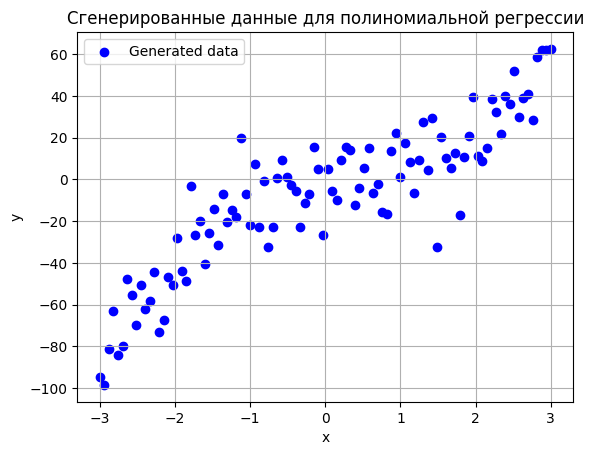

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры генерации
np.random.seed(42)  # для воспроизводимости
n_points = 100
x = np.linspace(-3, 3, n_points)
noise = np.random.normal(0, 15, size=n_points)

# Полиномиальная функция 3-й степени с шумом
y = 3 * x**3 - 2 * x**2 + x + noise

# Визуализация
plt.scatter(x, y, color='blue', label='Generated data')
plt.title("Сгенерированные данные для полиномиальной регрессии")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Далее добавим в исходный набор данных множество столбцов, соответствующих степеням основного признака, и применим линейную регрессию к расширенному набору данных.

In [43]:
z = np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)])
v = np.hstack([x.reshape(-1, 1)**i for i in range(2, 200)])
o = np.hstack([z, v])
print(o)

[[-3.00000000e+00 -9.45492877e+01  9.00000000e+00 ... -9.83755514e+93
   2.95126654e+94 -8.85379963e+94]
 [-2.93939394e+00 -9.84828467e+01  8.64003673e+00 ... -1.76516576e+92
   5.18851754e+92 -1.52510970e+93]
 [-2.87878788e+00 -8.13114688e+01  8.28741965e+00 ... -2.91275587e+90
   8.38520629e+90 -2.41392302e+91]
 ...
 [ 2.87878788e+00  6.17929474e+01  8.28741965e+00 ...  2.91275587e+90
   8.38520629e+90  2.41392302e+91]
 [ 2.93939394e+00  6.19254371e+01  8.64003673e+00 ...  1.76516576e+92
   5.18851754e+92  1.52510970e+93]
 [ 3.00000000e+00  6.24811930e+01  9.00000000e+00 ...  9.83755514e+93
   2.95126654e+94  8.85379963e+94]]


Разделим получившийся набор данных на обучающую и тестовую выборки (80 на 20)

In [44]:
train = o[:80]
test = o[80:-1]

Построим модели линейной регрессии:

- без регуляризации (обычная)
- с L2-регуляризацией (Ridge)
- с L1-регуляризацией (Lasso)

In [ ]:
def ridge_gradient_descent(X, y, lr=1e-4, epochs=1000, lambda_=0.01):
    """
    Attributes:
        X - матрица признаков, размер (samples, features)
        y - целевые значения (что мы хотим предсказать), вектор длиной samples
        lr - learning rate (шаг градиентного спуска). Скорость обучения модели
        epochs - сколько раз пройтись по всем данным
        lambda_ - коэффициент регуляризации (насколько сильно штрафовать за "большие веса")
    """

    m, n = X.shape # m - количество объектов, n - количество признаков
    w = np.zeros(n) # вектор весов, инициализация нулями

    for _ in range(epochs):
        error = X @ w - y
        grad = 2 * (X.T @ error + lambda_ * w)
        w -= lr * grad
        # X @ w - предсказания модели
        # error = Xw - y - вектор ошибок (насколько модель ошибается)
        # X.T @ error - производная MSE по весам
        # lambda_ * w - градиент от регуляризации (L2 добавляет штраф)
        # w -= lr * grad - обновляем веса, двигаясь в сторону уменьшения ошибки